In [83]:
import pandas as pd
from datetime import datetime
df1= pd.read_csv('/kaggle/input/ql3wke/achankovil(nasa).csv')
df1

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE
0,1984,1,1,5.22,29.16,17.33,2.33,101.02,4.85
1,1984,1,2,5.04,28.21,16.24,0.58,101.07,1.36
2,1984,1,3,5.52,29.05,16.30,0.11,101.11,2.79
3,1984,1,4,5.15,28.83,16.66,0.01,101.16,3.15
4,1984,1,5,5.03,29.34,15.87,0.07,101.08,3.22
...,...,...,...,...,...,...,...,...,...
13965,2022,3,27,5.50,31.29,18.43,10.55,100.93,4.41
13966,2022,3,28,6.67,31.60,19.17,10.15,100.89,4.43
13967,2022,3,29,6.70,31.65,19.41,3.93,100.80,3.71
13968,2022,3,30,6.16,31.50,19.29,5.07,100.78,3.84


In [84]:
df1['datetime'] = pd.to_datetime(df1[['YEAR', 'MO', 'DY']].rename(columns={'YEAR':'year', 'MO':'month', 'DY':'day'}))
df1['datetime'] = df1['datetime'].dt.strftime('%d/%m/%Y')
df1 = df1.drop(['YEAR', 'MO', 'DY'], axis=1)
df1

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,datetime
0,5.22,29.16,17.33,2.33,101.02,4.85,01/01/1984
1,5.04,28.21,16.24,0.58,101.07,1.36,02/01/1984
2,5.52,29.05,16.30,0.11,101.11,2.79,03/01/1984
3,5.15,28.83,16.66,0.01,101.16,3.15,04/01/1984
4,5.03,29.34,15.87,0.07,101.08,3.22,05/01/1984
...,...,...,...,...,...,...,...
13965,5.50,31.29,18.43,10.55,100.93,4.41,27/03/2022
13966,6.67,31.60,19.17,10.15,100.89,4.43,28/03/2022
13967,6.70,31.65,19.41,3.93,100.80,3.71,29/03/2022
13968,6.16,31.50,19.29,5.07,100.78,3.84,30/03/2022


In [85]:
df2 = pd.read_csv('/kaggle/input/ql3wke/achankovil_gage - Achankovil_Gauge-Discharge Data Thumpamon1977-2017 (3).csv', header=2,na_values='null')
df2 = df2.drop(['Observed/Computed','Data Type'],axis=1)
df2

,Day,Mean Gauge (m),Discharge (cumecs)
0,21/12/1977,2.535,9.000
1,22/12/1977,2.535,9.000
2,23/12/1977,2.530,8.800
3,24/12/1977,2.525,8.700
4,25/12/1977,2.515,8.500
...,...,...,...
14402,27/5/2017,1.590,NaN
14403,28/5/2017,1.550,NaN
14404,29/5/2017,1.570,NaN
14405,30/5/2017,1.975,23.618


merging two data set based on the common dates

In [86]:
df1['datetime'] = pd.to_datetime(df1['datetime'], format='%d/%m/%Y')
df2['Day'] = pd.to_datetime(df2['Day'], format='%d/%m/%Y')

df2 = df2.rename(columns={'Day': 'datetime'})
df2 = df2.set_index('datetime')
df1=df1.set_index('datetime')
df = pd.concat([df1, df2], axis=1, join='inner')

In [87]:
# from google.colab import files
# df.to_csv('chalakudi_combined.csv', index=True)
# files.download('chalakudi_combined.csv')

In [88]:
min(df['Discharge (cumecs)'])

0.0

In [89]:
max(df['Discharge (cumecs)'])

800.0

In [90]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN       0
TS                      0
QV2M                    0
PRECTOTCORR             0
PS                      0
WS10M_RANGE             0
Mean Gauge (m)          0
Discharge (cumecs)    209
dtype: int64

In [91]:
# df['TS'] = df['TS'].interpolate(method='linear')
# df['T2M'] = df['T2M'].interpolate(method='linear')
# df['QV2M'] = df['QV2M'].interpolate(method='linear')
# df['PRECTOTCORR'] = df['PRECTOTCORR'].interpolate(method='linear')
# df['PS'] = df['PS'].interpolate(method='linear')
# df['WS50M_RANGE'] = df['WS50M_RANGE'].interpolate(method='linear')
df['Discharge (cumecs)'] = df['Discharge (cumecs)'].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

In [92]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN     0
TS                    0
QV2M                  0
PRECTOTCORR           0
PS                    0
WS10M_RANGE           0
Mean Gauge (m)        0
Discharge (cumecs)    0
dtype: int64

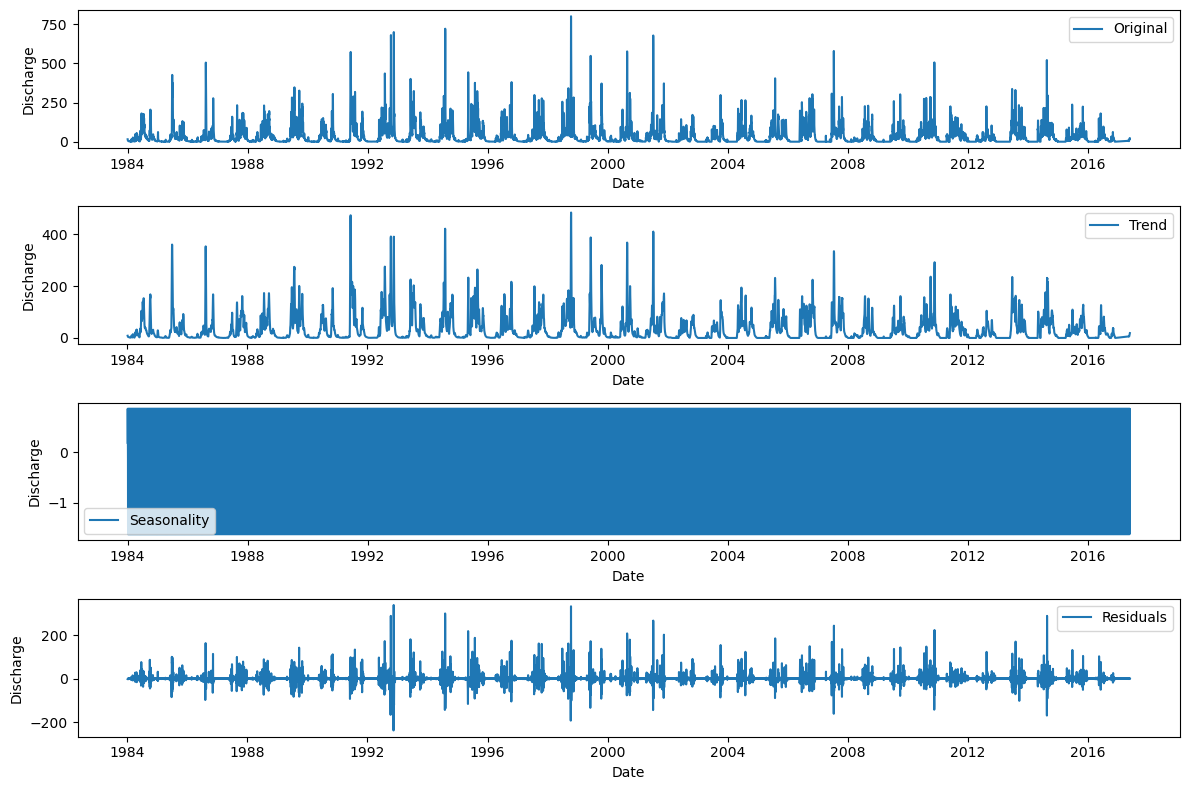

In [93]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Discharge (cumecs)'], model='additive')

trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(df['Discharge (cumecs)'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(seasonality,label='Seasonality')
plt.legend()
plt.subplot(414)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(residuals, label='Residuals')
plt.legend()
plt.tight_layout()

plt.show()

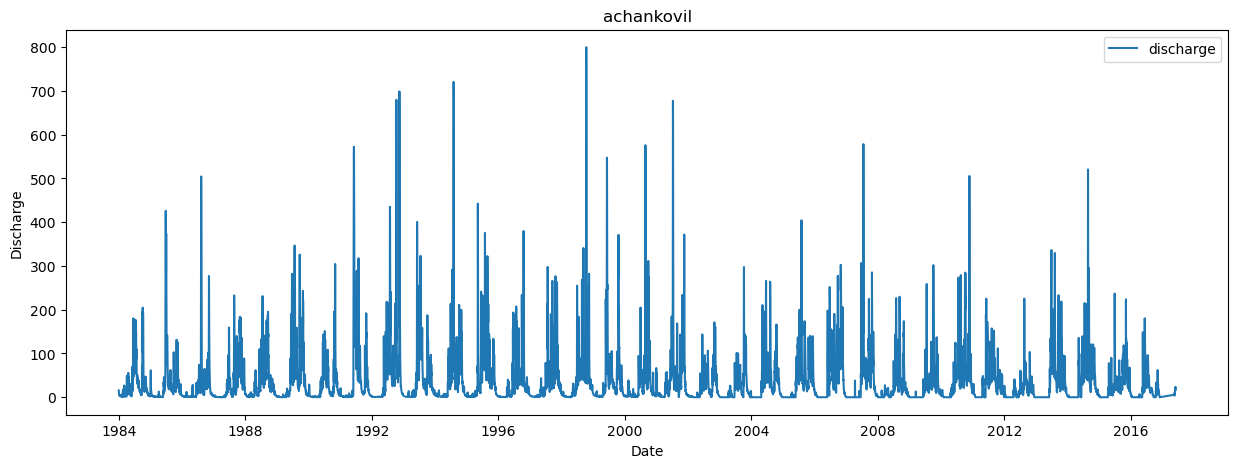

In [94]:
plt.figure(figsize=(15, 5))
plt.plot(df['Discharge (cumecs)'],label='discharge')
plt.title("achankovil")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()

In [95]:
df.corr()

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
ALLSKY_SFC_SW_DWN,1.000000,0.550497,-0.291537,-0.493982,0.287762,0.128207,-0.365938,-0.399264
TS,0.550497,1.000000,-0.234178,-0.315847,0.191810,0.369610,-0.499232,-0.483069
QV2M,-0.291537,-0.234178,1.000000,0.306786,-0.608159,-0.251329,0.236855,0.262931
PRECTOTCORR,-0.493982,-0.315847,0.306786,1.000000,-0.298242,-0.012852,0.319489,0.408788
PS,0.287762,0.191810,-0.608159,-0.298242,1.000000,0.125200,-0.155408,-0.214597
WS10M_RANGE,0.128207,0.369610,-0.251329,-0.012852,0.125200,1.000000,-0.128981,-0.106234
Mean Gauge (m),-0.365938,-0.499232,0.236855,0.319489,-0.155408,-0.128981,1.000000,0.733582
Discharge (cumecs),-0.399264,-0.483069,0.262931,0.408788,-0.214597,-0.106234,0.733582,1.000000


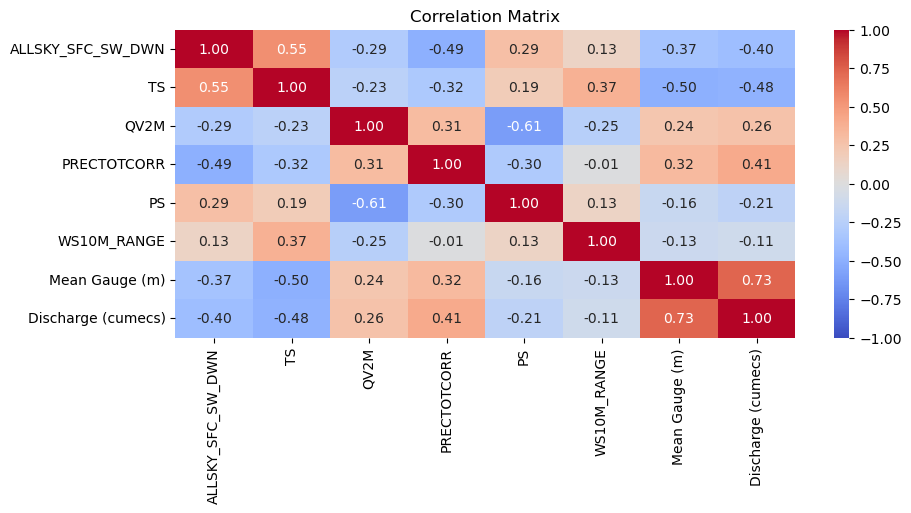

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [97]:
df

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-01-01,5.22,29.16,17.33,2.33,101.02,4.85,2.260,15.500000
1984-01-02,5.04,28.21,16.24,0.58,101.07,1.36,2.150,11.100000
1984-01-03,5.52,29.05,16.30,0.11,101.11,2.79,2.075,9.200000
1984-01-04,5.15,28.83,16.66,0.01,101.16,3.15,2.025,7.400000
1984-01-05,5.03,29.34,15.87,0.07,101.08,3.22,1.985,6.500000
...,...,...,...,...,...,...,...,...
2017-05-27,5.57,29.22,20.20,6.29,100.60,1.29,1.590,18.166455
2017-05-28,3.32,28.94,20.69,19.18,100.64,3.45,1.550,19.983636
2017-05-29,1.90,28.99,20.87,20.34,100.59,3.14,1.570,21.800818


splitting the data set to train and test data
train data- before 2010-01-10
test data- after 2010-01-10


In [98]:
df.index = pd.to_datetime(df.index)
cutoff_date = pd.to_datetime('2010-01-10')
train = df[df.index < cutoff_date]
test = df[df.index >= cutoff_date]
train

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-01-01,5.22,29.16,17.33,2.33,101.02,4.85,2.260,15.500
1984-01-02,5.04,28.21,16.24,0.58,101.07,1.36,2.150,11.100
1984-01-03,5.52,29.05,16.30,0.11,101.11,2.79,2.075,9.200
1984-01-04,5.15,28.83,16.66,0.01,101.16,3.15,2.025,7.400
1984-01-05,5.03,29.34,15.87,0.07,101.08,3.22,1.985,6.500
...,...,...,...,...,...,...,...,...
2010-01-05,5.42,29.10,15.56,0.00,100.86,2.22,0.640,2.755
2010-01-06,5.49,29.44,14.28,0.11,100.83,1.96,0.625,2.499
2010-01-07,5.58,29.23,15.50,0.01,100.91,3.72,0.622,2.707


In [99]:
test

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
2010-01-10,2.06,28.85,16.97,11.27,101.00,6.11,0.595,2.642000
2010-01-11,4.74,29.26,17.03,1.31,101.13,0.95,0.700,4.059000
2010-01-12,5.71,29.65,17.33,4.52,101.20,3.02,0.685,3.915000
2010-01-13,5.08,28.62,18.07,3.18,101.25,2.72,0.722,4.897000
2010-01-14,5.36,29.65,17.88,0.74,101.21,2.96,1.175,16.745000
...,...,...,...,...,...,...,...,...
2017-05-27,5.57,29.22,20.20,6.29,100.60,1.29,1.590,18.166455
2017-05-28,3.32,28.94,20.69,19.18,100.64,3.45,1.550,19.983636
2017-05-29,1.90,28.99,20.87,20.34,100.59,3.14,1.570,21.800818


In [100]:
x=test.index[0]
y=train.index[-1]
z=test.index
z

DatetimeIndex(['2010-01-10', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15', '2010-01-16', '2010-01-17',
               '2010-01-18', '2010-01-19',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='datetime', length=2699, freq='D')

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler=scaler.fit(df)

In [102]:
train =scaler.transform(train)
train

array([[0.68053691, 0.44071146, 0.62016202, ..., 0.32713755, 0.26113117,
        0.019375  ],
       [0.65637584, 0.34683794, 0.52205221, ..., 0.06765799, 0.2478941 ,
        0.013875  ],
       [0.72080537, 0.4298419 , 0.52745275, ..., 0.1739777 , 0.23886883,
        0.0115    ],
       ...,
       [0.72885906, 0.44762846, 0.45544554, ..., 0.24312268, 0.06401925,
        0.00338375],
       [0.68187919, 0.46442688, 0.57065707, ..., 0.16579926, 0.0631769 ,
        0.003325  ],
       [0.7114094 , 0.493083  , 0.61476148, ..., 0.09962825, 0.06197353,
        0.0030325 ]])

In [103]:
test=scaler.transform(test)
test

array([[0.25637584, 0.41007905, 0.58775878, ..., 0.42081784, 0.06077016,
        0.0033025 ],
       [0.61610738, 0.45059289, 0.59315932, ..., 0.03717472, 0.07340554,
        0.00507375],
       [0.74630872, 0.48913043, 0.62016202, ..., 0.19107807, 0.07160048,
        0.00489375],
       ...,
       [0.23489933, 0.42391304, 0.93879388, ..., 0.2       , 0.17809868,
        0.02725102],
       [0.51006711, 0.42786561, 0.98289829, ..., 0.09516729, 0.22683514,
        0.0295225 ],
       [0.71946309, 0.4229249 , 0.90639064, ..., 0.12713755, 0.21901324,
        0.02081   ]])

defining input shape to lstm
here input shape is (14,7) past 14 days values of 7 attributes
output shape is (1,3) 3 days future values 

In [104]:
import  numpy as np
trainx=[]
trainy=[]
n_future=3
n_past=14
for i in range(n_past,len(train)-n_future+1):
  # c = np.concatenate((train[i:i+1,0:3], train[i:i+1,4:8]), axis=1)
  trainx.append(train[i-n_past:i,0:8])
  trainy.append(train[i:i+n_future,7])
trainx,trainy=np.array(trainx),np.array(trainy)

In [105]:
trainx.shape

(9490, 14, 8)

In [106]:
trainy.shape

(9490, 3)

In [107]:
import tensorflow as tf
# import tf.keras as keras
from keras.models import Sequential
from keras.layers import LSTM,GRU,Bidirectional
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


In [108]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(units=256,activation='relu',return_sequences=True,input_shape=(n_past,8))))
model1.add(Bidirectional(LSTM(units=256,activation='relu',return_sequences=False)))
# model1.add(LSTM(units=256,activation='relu',return_sequences=True))
# model1.add(LSTM(units=128,activation='relu',return_sequences=True))
# model1.add(LSTM(units=128,activation='relu',return_sequences=True))
# model1.add(LSTM(units=128,activation='relu',return_sequences=True))
# model1.add(LSTM(units=64,activation='relu'))
model1.add(Dense(n_future,activation='relu'))
model1.compile(optimizer='adam',loss='mse')
model1.build(input_shape=(None, n_past, 8))

In [109]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 14, 512)          542720    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 512)              1574912   
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 2,119,171
Trainable params: 2,119,171
Non-trainable params: 0
_________________________________________________________________


In [110]:
model1.fit(trainx, trainy, epochs=200, batch_size=8000, validation_split=0.2, verbose=1)

Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 0.0074 - val_loss: 0.0071
Epoch 2/200
1/1 [==============================] - 0s 426ms/step - loss: 0.0088 - val_loss: 0.0036
Epoch 3/200
1/1 [==============================] - 0s 409ms/step - loss: 0.0055 - val_loss: 0.0033
Epoch 4/200
1/1 [==============================] - 0s 410ms/step - loss: 0.0054 - val_loss: 0.0033
Epoch 5/200
1/1 [==============================] - 0s 408ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 6/200
1/1 [==============================] - 0s 406ms/step - loss: 0.0047 - val_loss: 0.0024
Epoch 7/200
1/1 [==============================] - 0s 410ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 8/200
1/1 [==============================] - 0s 406ms/step - loss: 0.0042 - val_loss: 0.0028
Epoch 9/200
1/1 [==============================] - 0s 407ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 10/200
1/1 [==============================] - 0s 406ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 11/200

In [111]:
asd=model1.predict(trainx)

297/297 [==============================] - 3s 8ms/step


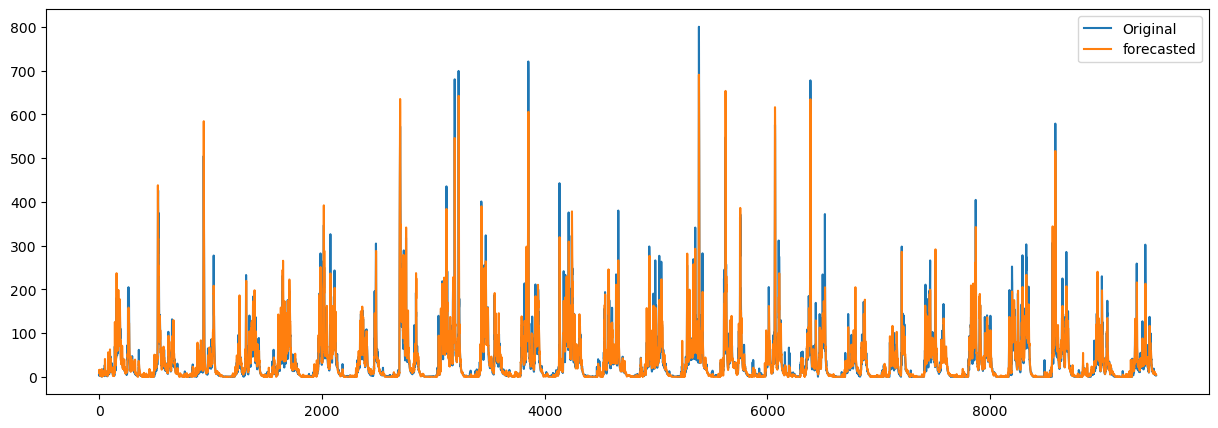

RMSE: 21.171760924677148
R-squared score: 0.88
MAD: 9.912627838956581
MAE score: 9.91


In [112]:
first_elements = [[row[0]] for row in asd]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

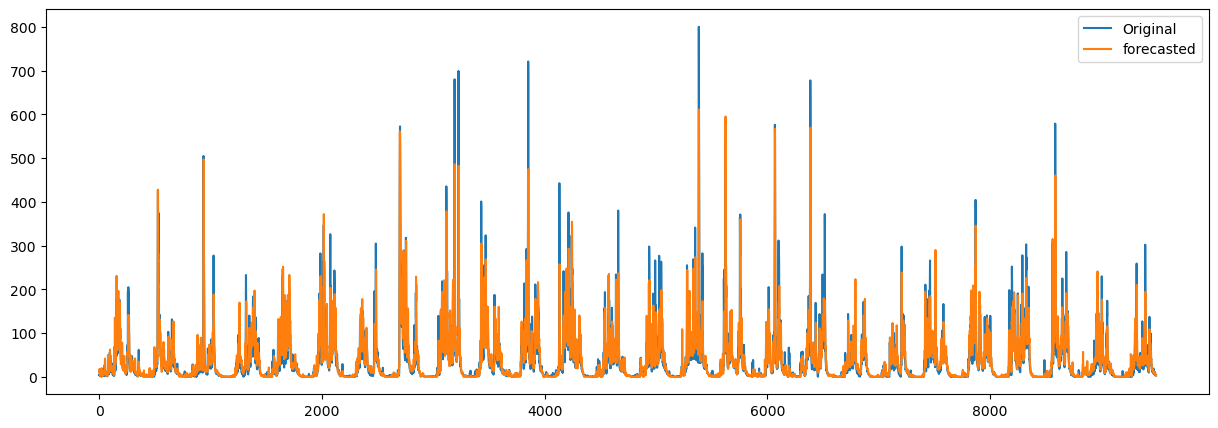

RMSE: 30.810703523917855
R-squared score: 0.75
MAD: 14.453061642145208
MAE score: 14.45


In [113]:
second_elements = [[row[1]] for row in asd]
#print(first_elements)
ppprr=np.array(second_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+1:-1],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

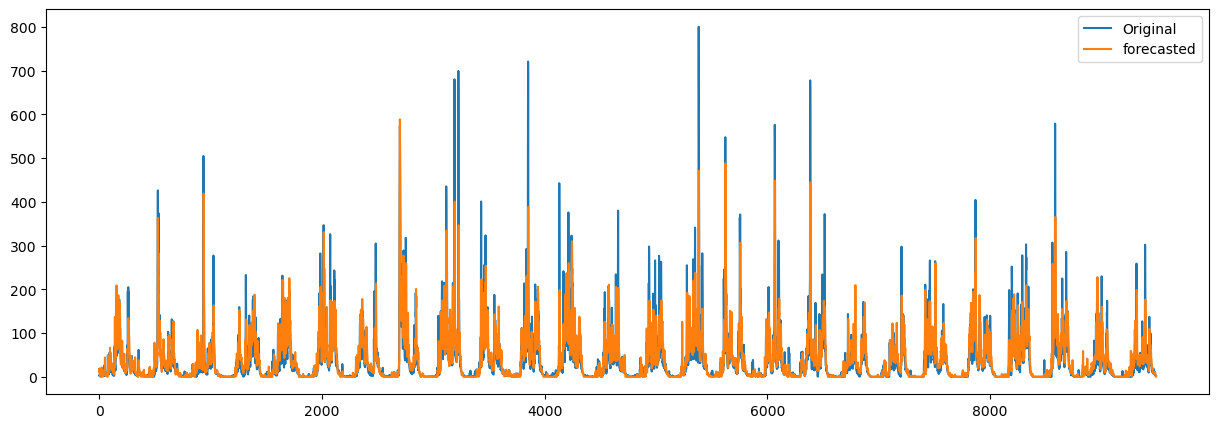

RMSE: 37.337983332086885
R-squared score: 0.63
MAD: 17.654762701598287
MAE score: 17.65


In [114]:
third_elements = [[row[2]] for row in asd]
#print(first_elements)
ppprr=np.array(third_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

for testing 
input shape is (14,7) past 14 days values of 7 attributes 
output shape is (1,3) 3 days future values

In [115]:
testx=[]
testy=[]
n_future=3
n_past=14
for i in range(n_past,len(test)-n_future+1):
  # c = np.concatenate((test[i:i+1,0:3], test[i:i+1,4:8]), axis=1)
  testx.append(test[i-n_past:i,0:8])
  testy.append(test[i:i+n_future,7])
testx,testy=np.array(testx),np.array(testy)

In [116]:
testy

array([[0.00345625, 0.00356   , 0.00307875],
       [0.00356   , 0.00307875, 0.00286125],
       [0.00307875, 0.00286125, 0.        ],
       ...,
       [0.02270807, 0.02497955, 0.02725102],
       [0.02497955, 0.02725102, 0.0295225 ],
       [0.02725102, 0.0295225 , 0.02081   ]])

In [117]:
testx.shape

(2683, 14, 8)

In [118]:
testx.shape

(2683, 14, 8)

In [119]:
fore=model1.predict(testx)

84/84 [==============================] - 1s 8ms/step


In [120]:
fore

array([[0.00481819, 0.00345471, 0.        ],
       [0.00608619, 0.00485398, 0.00112085],
       [0.00511379, 0.00404903, 0.00044401],
       ...,
       [0.02743326, 0.03720412, 0.04295579],
       [0.02086414, 0.02858415, 0.03370784],
       [0.04129095, 0.05291628, 0.06014861]], dtype=float32)

fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day1,day2,day3...)

In [121]:
first_elements = [[row[0]] for row in fore]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)

In [122]:
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

In [123]:
first_elements = [[row[7]] for row in test]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)

In [124]:
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape

(2699,)

In [125]:
# disc_org=disc_org[n_past:-2]
# disc_org.shape

In [126]:
min(disc)

0.0

In [127]:
max(disc)

355.56827

In [128]:
min(disc_org)

0.0

In [129]:
max(disc_org)

520.6

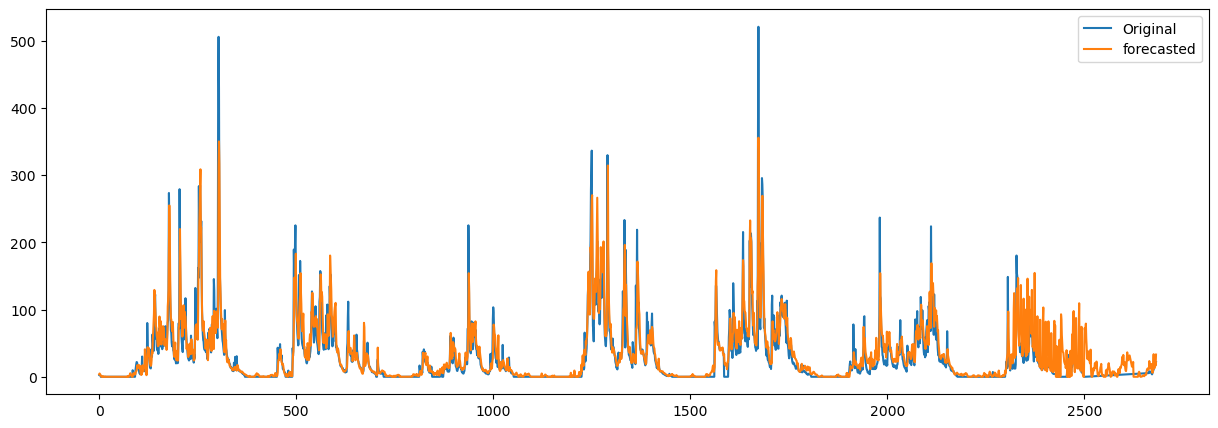

RMSE: 21.980921269674916
R-squared score: 0.78
MAD: 10.958522409337844
MAE score: 10.96


In [130]:
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [131]:

forcast_period_dates=pd.date_range(x,periods=len(test),freq='1d').tolist()
forcast_dates=[]
for time in forcast_period_dates:
    forcast_dates.append(time.date())
print(forcast_dates[0])
print(len(forcast_dates))
forcast_dates[-1]

2010-01-10
2699


datetime.date(2017, 5, 31)

In [132]:

dt_forcast = np.column_stack((forcast_dates[n_past:-2], disc))
dt_forcast = pd.DataFrame(dt_forcast, columns=['Date', 'discharge'])
dt_forcast['Date'] = pd.to_datetime(dt_forcast['Date'])
dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC

dt_forcast = dt_forcast.set_index('Date')


orginal = disc_org[n_past:-2]
dt = np.column_stack((forcast_dates[n_past:-2], orginal))
dt = pd.DataFrame(dt, columns=['Date', 'discharge'])
dt['Date'] = pd.to_datetime(dt['Date'])
dt['Date'] = dt['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC


dt = dt.set_index('Date')
dt_forcast


,discharge
Date,
2010-01-24,3.854548
2010-01-25,4.868954
2010-01-26,4.091032
2010-01-27,2.839888
2010-01-28,1.510646
...,...
2017-05-25,12.624208
2017-05-26,19.642563
2017-05-27,21.946611


In [133]:
dt

,discharge
Date,
2010-01-24,2.765
2010-01-25,2.848
2010-01-26,2.463
2010-01-27,2.289
2010-01-28,0.0
...,...
2017-05-25,14.532091
2017-05-26,16.349273
2017-05-27,18.166455


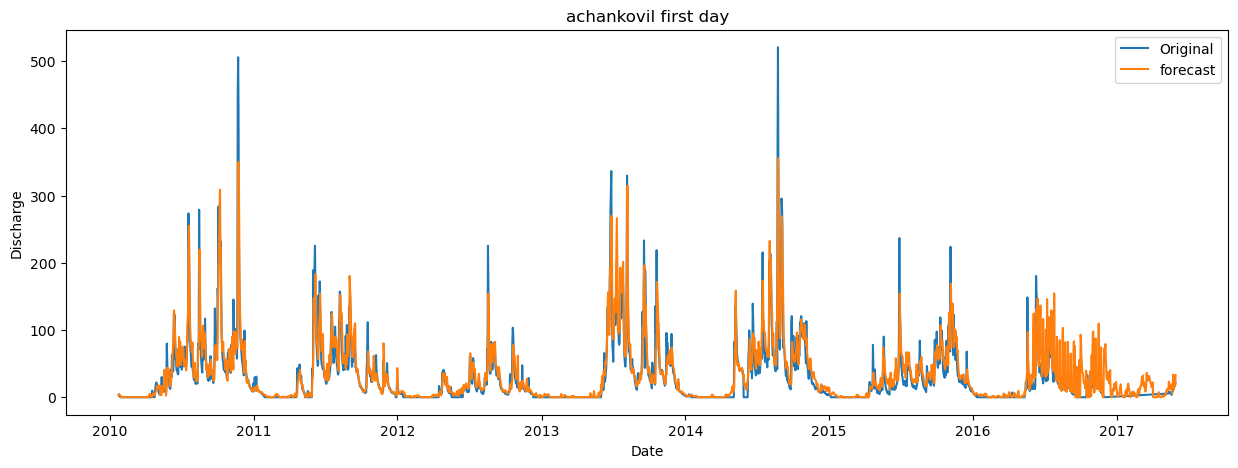

In [134]:
plt.figure(figsize=(15, 5))
plt.plot(dt.index, dt, label='Original')
plt.plot(dt_forcast.index, dt_forcast['discharge'], label='forecast')
plt.legend()
plt.title("achankovil first day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.show()

In [135]:
dt['discharge'][-10:-1]

Date
2017-05-20     5.446182
2017-05-21     7.263364
2017-05-22     9.080545
2017-05-23    10.897727
2017-05-24    12.714909
2017-05-25    14.532091
2017-05-26    16.349273
2017-05-27    18.166455
2017-05-28    19.983636
Name: discharge, dtype: object

In [136]:
disc_org[-10:-1]

array([ 9.08054545, 10.89772727, 12.71490909, 14.53209091, 16.34927273,
       18.16645455, 19.98363636, 21.80081818, 23.618     ])

In [137]:
dt_forcast['discharge'][:10]

Date
2010-01-24    3.854548
2010-01-25    4.868954
2010-01-26    4.091032
2010-01-27    2.839888
2010-01-28    1.510646
2010-01-29    0.636453
2010-01-30         0.0
2010-01-31         0.0
2010-02-01    0.201181
2010-02-02    1.078651
Name: discharge, dtype: object

In [138]:
disc[:10]

array([3.8545482 , 4.8689537 , 4.091032  , 2.8398883 , 1.5106462 ,
       0.63645315, 0.        , 0.        , 0.20118132, 1.0786507 ],
      dtype=float32)

In [139]:
dt_forcast['discharge'][-10:-1]

Date
2017-05-20       5.9406
2017-05-21    12.427999
2017-05-22    21.549919
2017-05-23    33.586395
2017-05-24     15.40299
2017-05-25    12.624208
2017-05-26    19.642563
2017-05-27    21.946611
2017-05-28    16.691311
Name: discharge, dtype: object

In [140]:
disc[-10:-1]

array([ 5.9406   , 12.4279995, 21.54992  , 33.586395 , 15.40299  ,
       12.624208 , 19.642563 , 21.946611 , 16.69131  ], dtype=float32)

In [141]:
rmse = sqrt(mean_squared_error(dt_forcast['discharge'],dt['discharge']))
print("RMSE:",rmse)
from sklearn.metrics import mean_squared_error, r2_score
import math
actual = disc_org[n_past:-2]
forecast = disc
r2 = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2))


RMSE: 21.980921269674916
R-squared score: 0.78


fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take second col only (day2,day3,day4...)

In [142]:
second_elements = [[row[1]] for row in fore]
# print(second_elements)
pppr=np.array(second_elements)
# print(pppr.shape)


In [143]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

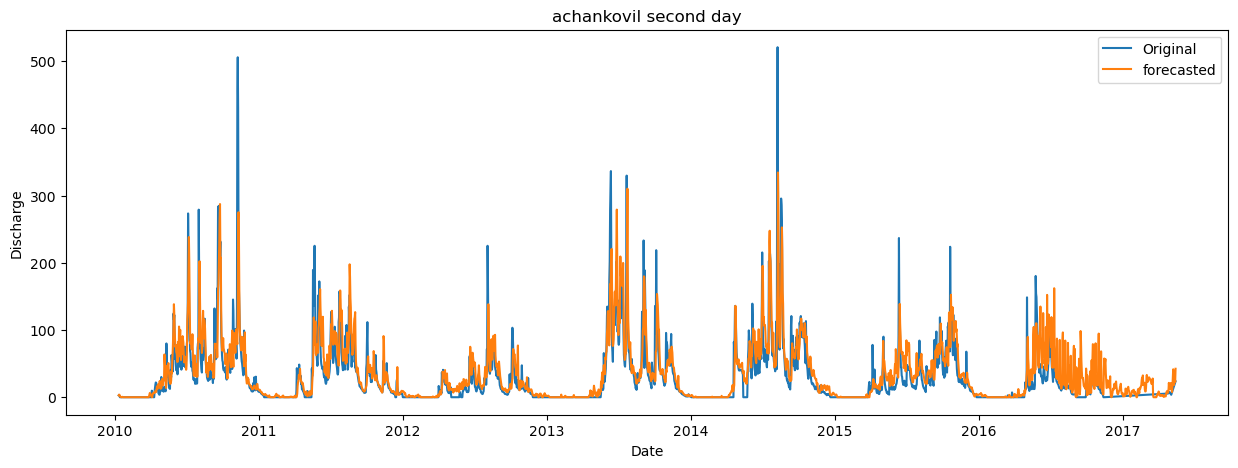

RMSE: 28.61394638406869
R-squared score: 0.62
MAD: 14.719103077300947
MAE score: 14.72


In [144]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+1:-1]))]

plt.figure(figsize=(15, 5))
plt.plot(dates,disc_org[n_past+1:-1],label='Original')
plt.plot(dates,disc,label='forecasted')
plt.title("achankovil second day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day3,day4,day5...)

In [145]:
third_elements = [[row[2]] for row in fore]
#print(third_elements)
pppr=np.array(third_elements)
# print(pppr.shape)


In [146]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape


(2683,)

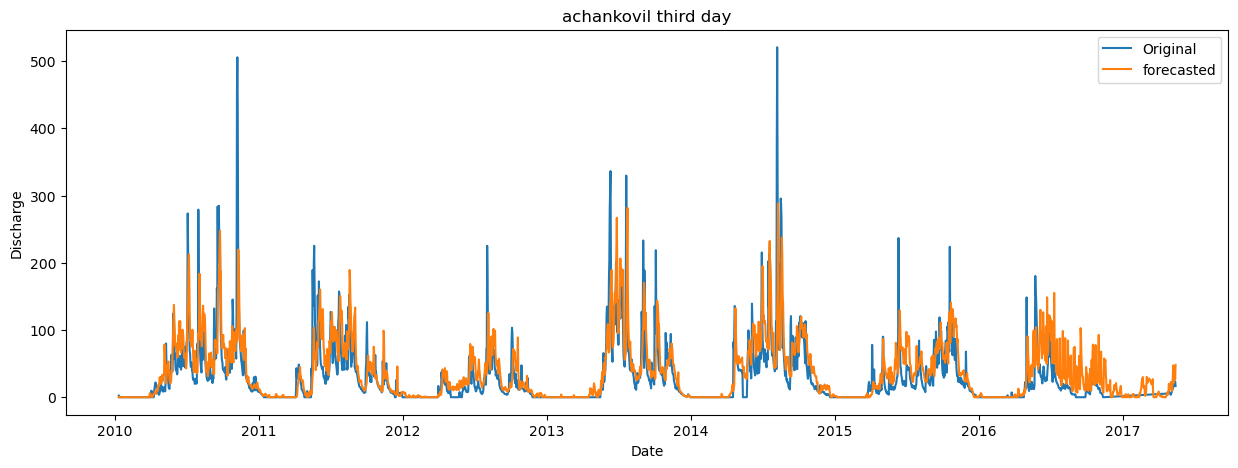

RMSE: 33.81283758109573
R-squared score: 0.47
MAD: 17.890576012531586
MAE score: 17.89


In [147]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+2:len(disc_org)]))]

plt.figure(figsize=(15, 5))
plt.plot(dates,disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(dates,disc,label='forecasted')
plt.title("achankovil third day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [148]:
# model1.save('final_achankovil_bilstm.h5')

In [149]:
#!pip install kaggle
